# Point Process Optimization with Kernel-Based Potentials

This notebook implements optimization of point configurations in a d-dimensional phase space using pair potentials defined by a kernel function.

In [8]:
# Load Pyhton code
import numpy as np
import matplotlib.pyplot as plt
from point_process_optimizer import PointProcessOptimizer, PointProcessDiagnostics


## 1. Example: 2D Optimisation

In [2]:
# Define a repulsive kernel (Coulomb-like)
kernel_repulsive = lambda r: 1.0 / (r + 1e-8)

# Create optimizer for 2D with 20 points
opt_2d = PointProcessOptimizer(d=2, n=36, kernel=kernel_repulsive)

# Generate initial random configuration
X_init = opt_2d.generate_random_points()
print(f"Initial potential: {opt_2d.compute_potential(X_init.flatten()):.4f}")

# Optimize
X_opt = opt_2d.optimize(X_init)
print(f"Optimized potential: {opt_2d.compute_potential(X_opt.flatten()):.4f}")

Initial potential: 1893.6042
Optimized potential: 1227.2085


In [3]:

# Generate initial random configuration
X_init = opt_2d.generate_random_points()
print(f"Initial potential: {opt_2d.compute_potential(X_init.flatten()):.4f}")

# Optimize
X_opt = opt_2d.optimize(X_init)
print(f"Optimized potential: {opt_2d.compute_potential(X_opt.flatten()):.4f}")

Initial potential: 1815.9659
Optimized potential: 1227.2085


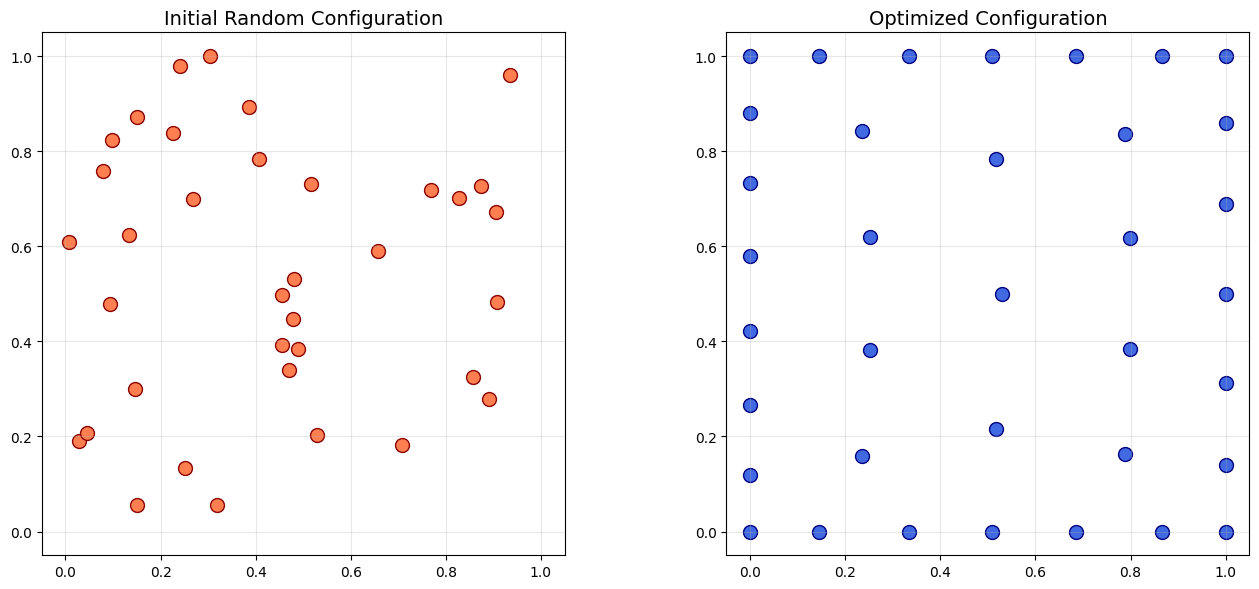

In [4]:
# Plot before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_init[:, 0], X_init[:, 1], s=100, c='coral', edgecolors='darkred')
axes[0].set_title('Initial Random Configuration', fontsize=14)
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.05, 1.05)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_opt[:, 0], X_opt[:, 1], s=100, c='royalblue', edgecolors='navy')
axes[1].set_title('Optimized Configuration', fontsize=14)
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

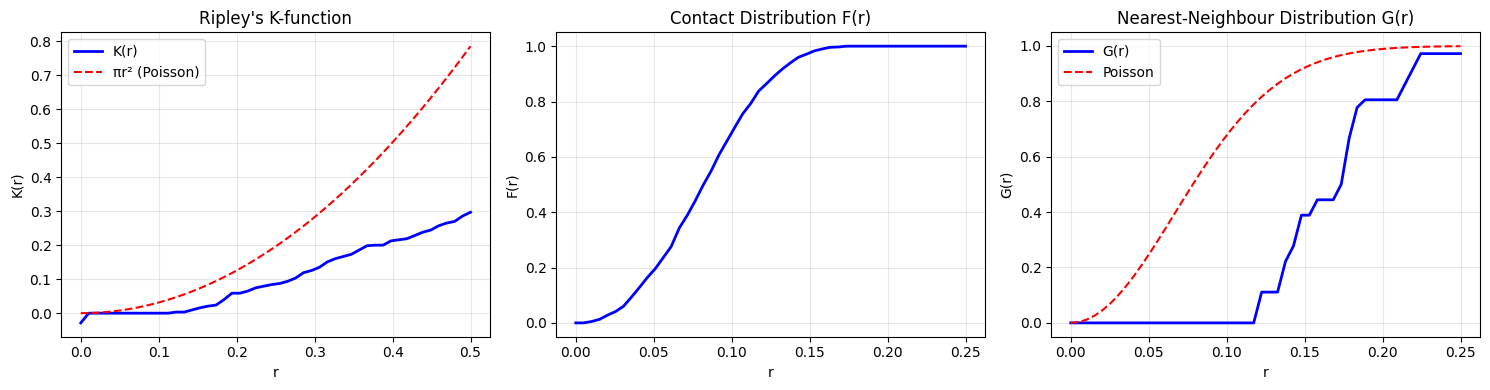

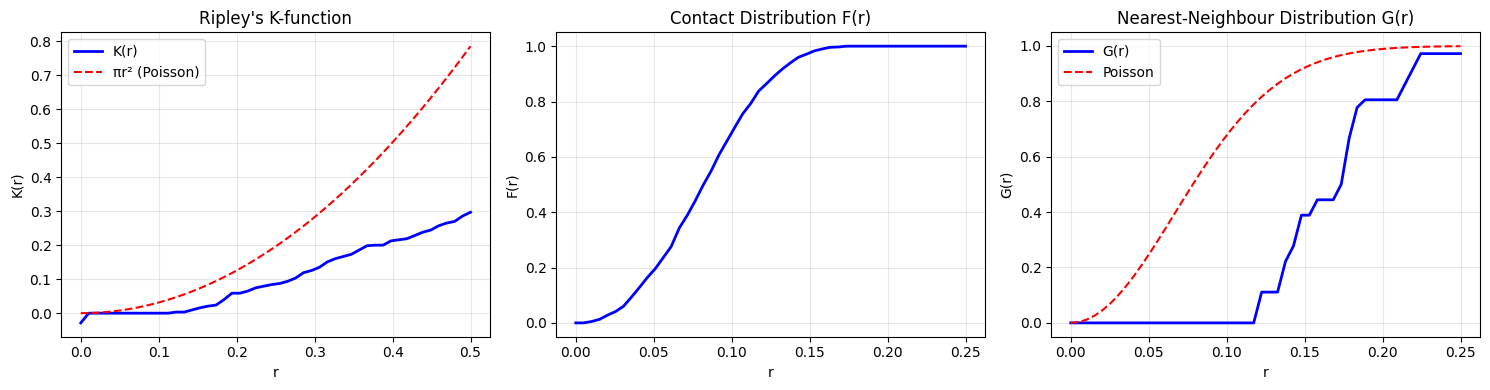

In [5]:
# Compute diagnostics for optimized configuration
diag_2d = PointProcessDiagnostics(X_opt)
diag_2d.plot_all_diagnostics()

## 2. Example: 1D Optimization

Optimal positions: [0.         0.09025421 0.1999349  0.31751304 0.43880061 0.5612025
 0.6824864  0.80006403 0.90974517 1.        ]


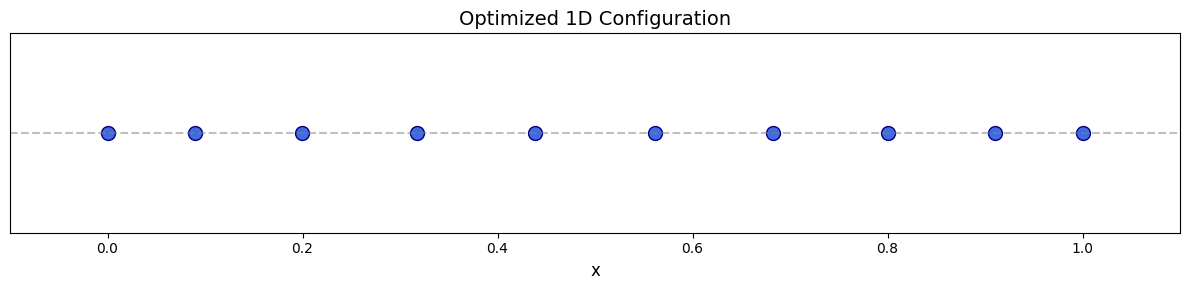

In [9]:
opt_1d = PointProcessOptimizer(d=1, n=10, kernel=kernel_repulsive)
X_opt_1d = opt_1d.optimize()
opt_1d.plot_configuration(title='Optimized 1D Configuration')
print(f"Optimal positions: {np.sort(X_opt_1d.flatten())}")

## 3. Example: 3D Interactive Optimization

In [10]:
opt_3d = PointProcessOptimizer(d=3, n=15, kernel=kernel_repulsive)
X_opt_3d = opt_3d.optimize()
print(f"Optimized 3D potential: {opt_3d.compute_potential(X_opt_3d.flatten()):.4f}")
opt_3d.plot_configuration(title='Optimized 3D Configuration')

Optimized 3D potential: 106.3745


## 4. Custom Kernel Examples

In [ ]:
# Lennard-Jones like kernel (repulsive at short range, attractive at long)
kernel_lj = lambda r: (1/(r+0.1))**12 - 2*(1/(r+0.1))**6

# Gaussian kernel
kernel_gauss = lambda r: np.exp(-r**2 / 0.1)

# Test with Gaussian kernel
opt_gauss = PointProcessOptimizer(d=2, n=25, kernel=kernel_gauss)
X_gauss = opt_gauss.optimize()
opt_gauss.plot_configuration(title='Gaussian Kernel - Optimized 2D')

## 5. Custom Bounds Example

In [ ]:
# Rectangular domain
opt_rect = PointProcessOptimizer(
    d=2, n=30,
    minima=[0, 0],
    maxima=[2, 1],
    kernel=kernel_repulsive
)
X_rect = opt_rect.optimize()
opt_rect.plot_configuration(title='Rectangular Domain [0,2]×[0,1]')